In [7]:
#matplotlib inline

#  Interpolation

## Interpolation in 1D

In [37]:
Adapted from https://scipy-lectures.org/intro/scipy/auto_examples/plot_interpolation.html
    accessed 23 November 2019

SyntaxError: invalid syntax (<ipython-input-37-a16b5af5d167>, line 1)

In [ ]:
# Generate data
import numpy as np
np.random.seed(0)
measured_time = np.linspace(0, 1, 10)
noise = 1e-1 * (np.random.random(10)*2 - 1)
measures = np.sin(2 * np.pi * measured_time) + noise

# Interpolate it to new time points
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

In [ ]:
# given points are (x,y) = (1,2), (2,1.6)
x = np.array([1,2])
y = np.array([2,1.6])
# create an object to represent linear interpolation
linear_interp = interp1d(x,y)
# find value at x value specfied (xinterp=1.3)
xinterp=1.3
yinterp = linear_interp(xinterp)
print(f'interpolating (1,2) and (2,1.6) at x = {xinterp} gives {yinterp}')

## Interpolation in 2D (bilinear interpolation)

In [ ]:
from scipy import interpolate
x = np.array([[0,1],[0,1]])
y = np.array([[0,0],[1,1]]) 
# i.e order of values for rho = 
#[[(0,0),(1,0)],
# [(0,1),(1,1)]]

z = np.array([[1,3],[2,4]])
print('x=',x)
print('y=',y)
print('z-',z)
f = interpolate.interp2d(x, y, z, kind='linear')

#interpolate at x = 0.7, y = 0.2 using "f"
xinterp = 0.7
yinterp = 0.2
zinterp = f(xinterp, yinterp)
print(f'value of z interpolated at ({xinterp},{yinterp}) is {zinterp}')

### Interpolation of a function
Example adapted from:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.interp2d.html
    Accessed 23 November 2019

In [ ]:
#Construct a 2-D grid and interpolate on it:

from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
# Define interpolation function, f
f = interpolate.interp2d(x, y, z, kind='cubic')


plt.plot(x, z[0, :], 'ro-', x, z[0, :], 'b-')
plt.title('2D samples of surface along a single plane ')
plt.show()

### Create 3D plot of surface, sampled

In [ ]:


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

xgrid, ygrid = np.meshgrid(x, y)

print(f'xgrid {np.shape(xgrid)} ygrid {np.shape(ygrid)} z {np.shape(z)}')
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1,projection='3d')
surf = ax.plot_surface(xgrid, ygrid, z, linewidth=0, cmap=cm.plasma)
plt.show()


In [ ]:
#Now use the obtained interpolation function and plot the result:

# Create finer mesh for cubic interpolation
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
# Form new values of z from cubic interpolation
znew = f(xnew, ynew)

# Plot cubic interpolated points in blue
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.title('Cubic interpolation along single plane ')
plt.show()

### 3D surface by cubic interpolation

In [ ]:
xgrid, ygrid = np.meshgrid(xnew, ynew)

print(f'xgrid {np.shape(xgrid)} ygrid {np.shape(ygrid)} z {np.shape(znew)}')
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1,projection='3d')
surf = ax.plot_surface(xgrid, ygrid, znew, linewidth=0, cmap=cm.plasma)
plt.show()


## Interpolation using convolution

In [38]:
# define function for interleaving a vector with zeros (upsample)
def upsample(a):
    len_a, = np.shape(a)
    b = np.zeros(len_a)
    arr_tuple = (a,b)
    print(f'arr_tuple= {arr_tuple}')
    print(np.vstack(arr_tuple).reshape((-1)))
    ainterleaved = np.vstack(arr_tuple).reshape((-1,), order='F')
    return(ainterleaved)

from scipy import ndimage
    

a = np.array([0,1,3,1,5,7,1,0])


ainterleaved = upsample(a)
len_ainterleaved, = np.shape(ainterleaved)

ainterp = ndimage.convolve(ainterleaved,np.array([0.5,1,0.5]),mode='reflect')
len_ainterp, = np.shape(ainterp)


print(f'interpolated version of a (linear interp) = {ainterp}')

x = np.arange(0,len_a)

plt.stem(x,a, use_line_collection=True)
plt.title('original vector (a)')
plt.show()

x = np.arange(0,len_ainterleaved)
plt.stem(x,ainterleaved, use_line_collection=True)
plt.title('vector (a) interleaved with zeros')
plt.show()

x = np.arange(0,len_ainterp)
plt.stem(x,ainterp,use_line_collection=True)
plt.title('vector (a) (linearly interpolated at midvalues)')
plt.show()



arr_tuple= (array([0, 1, 3, 1, 5, 7, 1, 0]), array([0., 0., 0., 0., 0., 0., 0., 0.]))
[0. 1. 3. 1. 5. 7. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
interpolated version of a (linear interp) = [0.  0.5 1.  2.  3.  2.  1.  3.  5.  6.  7.  4.  1.  0.5 0.  0. ]


NameError: name 'len_a' is not defined

## Show linear interpolation using matrix multiplication

Matrix for linear interpolation:

[[1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.

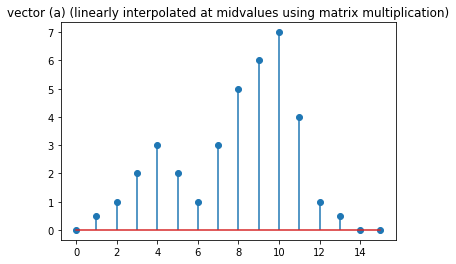

In [39]:
# Create matrix for interpolation as the sum of three diagonal matrices:
A1 = np.diag(np.repeat(1, len_ainterleaved))
A2 = np.diag(np.repeat(0.5, len_ainterleaved-1),k=1)
A3 = np.diag(np.repeat(0.5, len_ainterleaved-1),k=-1)
A = A1 + A2 + A3
print('Matrix for linear interpolation:\n')
print(A)

# matrix mult
ainterp2 = np.matmul(A,ainterleaved)

print(f'\n\n ainterp2 = {ainterp2}\n')

len_ainterp2, = np.shape(ainterp2)
x = np.arange(0,len_ainterp2)
plt.stem(x,ainterp2, use_line_collection=True)
plt.title('vector (a) (linearly interpolated at midvalues using matrix multiplication)')
plt.show()



## Interpolação num grid regular por convolução

In [40]:
import numpy as np
from scipy import ndimage


def interleave2(a):
    lin, col = a.shape
    b = np.zeros((2*lin, 2*col))
    b[::2, ::2] = a 
    return (b)


A = np.array([[1,2,1],    [3,3,2],    [2,4,4]])
B = interleave2(A)
print(f' B = \n {B}')

# Convolve with 2d kernel (pad with zeros)
intKer = np.array([[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]])
C = ndimage.convolve(B,intKer,  mode='constant', cval=0.0)
print(f' C = \n {C}')

 B = 
 [[1. 0. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [3. 0. 3. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0.]
 [2. 0. 4. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0.]]
 C = 
 [[1.   1.5  2.   1.5  1.   0.5 ]
 [2.   2.25 2.5  2.   1.5  0.75]
 [3.   3.   3.   2.5  2.   1.  ]
 [2.5  3.   3.5  3.25 3.   1.5 ]
 [2.   3.   4.   4.   4.   2.  ]
 [1.   1.5  2.   2.   2.   1.  ]]


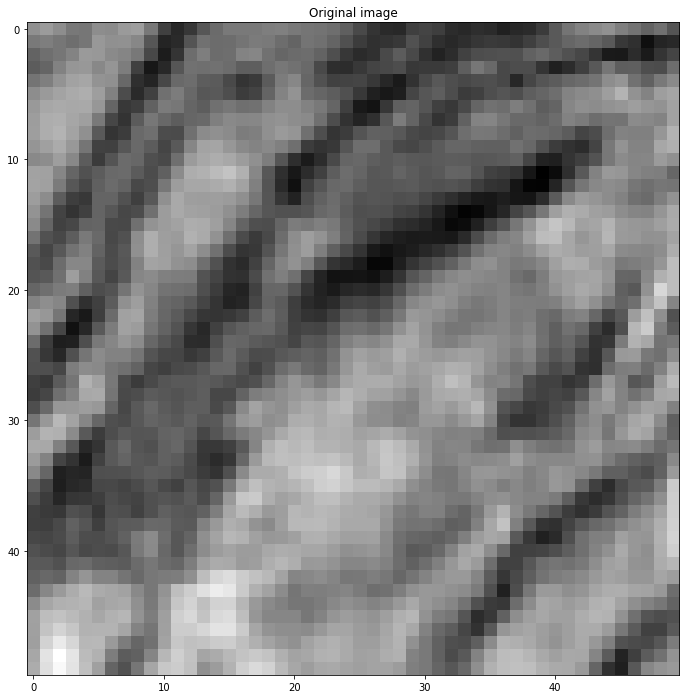

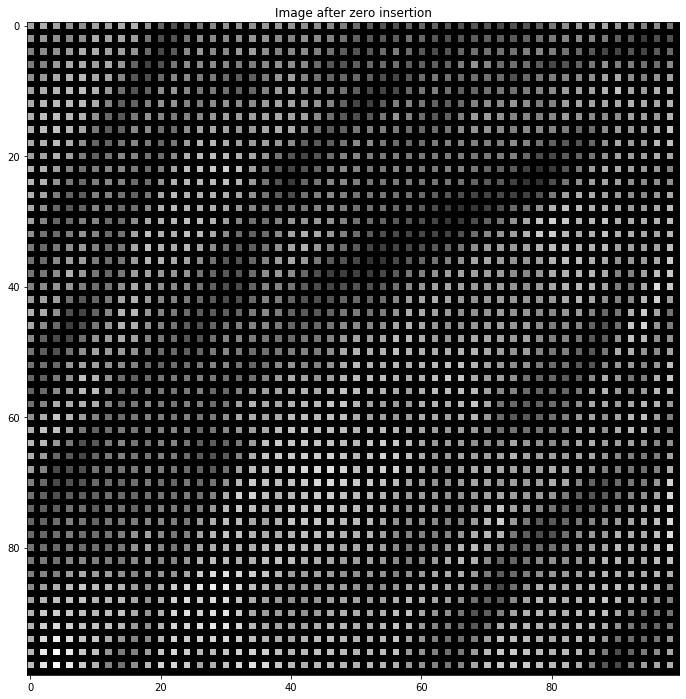

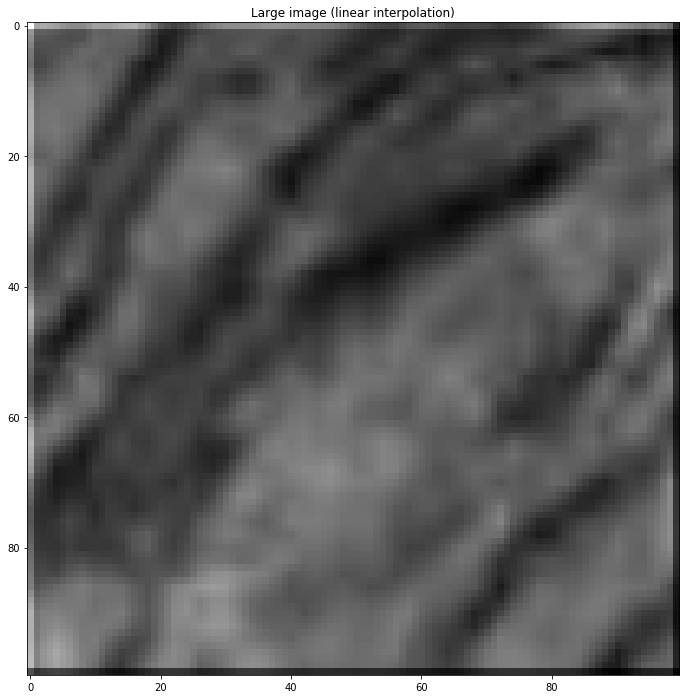

In [46]:
from skimage import data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage

# import image from skimage
im=data.immunohistochemistry()

#convert to grayscale
grayIm = rgb2gray(im)
grayIm = grayIm[0:50,0:50]

plt.figure(figsize=(12,12))
plt.imshow(grayIm,cmap='gray')
plt.title('Original image')
plt.show()

#Interleave with zeros (2D)
imInter = interleave2(grayIm)
plt.figure(figsize=(12,12))
plt.imshow(imInter,cmap='gray')
plt.title('Image after zero insertion')
plt.show()

#Convolve with linear interpolation kernel
intKer = np.array([[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]])
largeim = ndimage.convolve(imInter,intKer, mode='reflect')
plt.figure(figsize=(12,12))
plt.imshow(largeim,cmap='gray')
plt.title('Large image (linear interpolation)')
plt.show()


## Show that we can implement linear interpolation as two separate processes:
linear interpolation along rows followed by linear interp along columns.


#Convolve with linear interpolation kernel - rows
intKer = np.array([[0.5,1,0.5]])
largeim = ndimage.convolve(imInter,intKer, mode='reflect')
plt.figure(figsize=(12,12))
plt.imshow(largeim,cmap='gray')
plt.title('Linear interpolation along rows')
plt.show()

#Convolve with linear interpolation kernel - cols
intKer = np.array([[0.5],[1],[0.5]])
largeim = ndimage.convolve(largeim,intKer, mode='reflect')
plt.figure(figsize=(12,12))
plt.imshow(largeim,cmap='gray')
plt.title('Linear interpolation along rows followed by columns')
plt.show()

## Geometric transforms

### Forward Transform

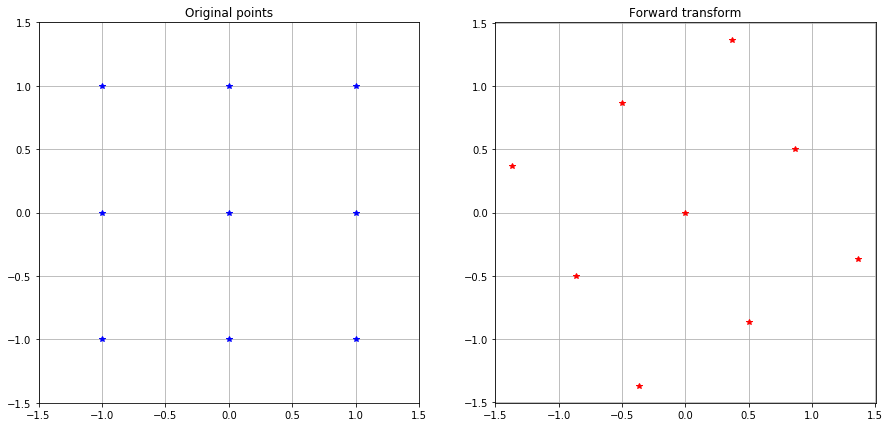

In [112]:
import numpy as np
import math
import matplotlib.pyplot as plt

theta = math.pi/6

#tranformation matrix, T
T=[[np.cos(theta),np.sin(theta),0],
[-np.sin(theta),np.cos(theta),0],
[0,0,1]];

#Create Coords, U,V
x = np.arange(-1,2)
y = np.arange(-1,2)
U,V= np.meshgrid(x,y)


#Create list of points, X, from U and V
X=np.zeros([9,3])
for i in range (0,3):
    for j in range (0,3):
        X[3*i+j,:] = np.array([U[i,j],V[i,j],1])
 
Y = np.matmul(X,T)

# Plot X and Y
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(15,7))
ax1.plot(X[:,0],X[:,1],'b*')
ax1.set_title('Original points')
ax1.grid(True)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])

ax2.plot(Y[:,0],Y[:,1],'r*')
ax2.set_title('Forward transform')
ax2.grid(True)


### Inverse Transform

(-1.5, 1.5)

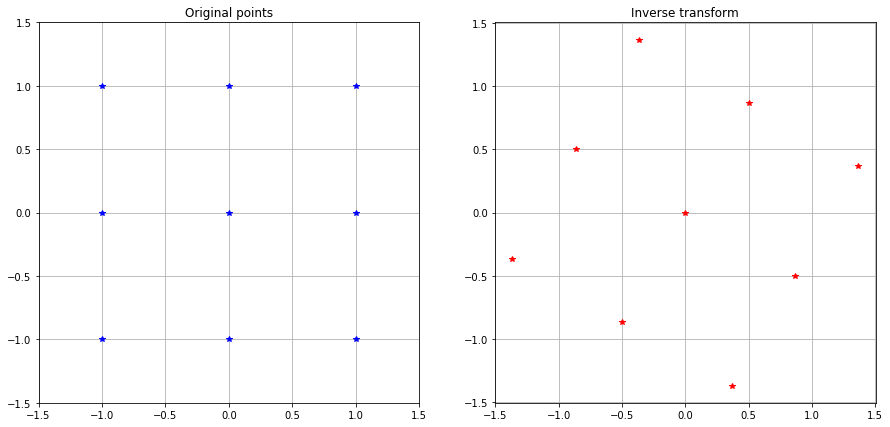

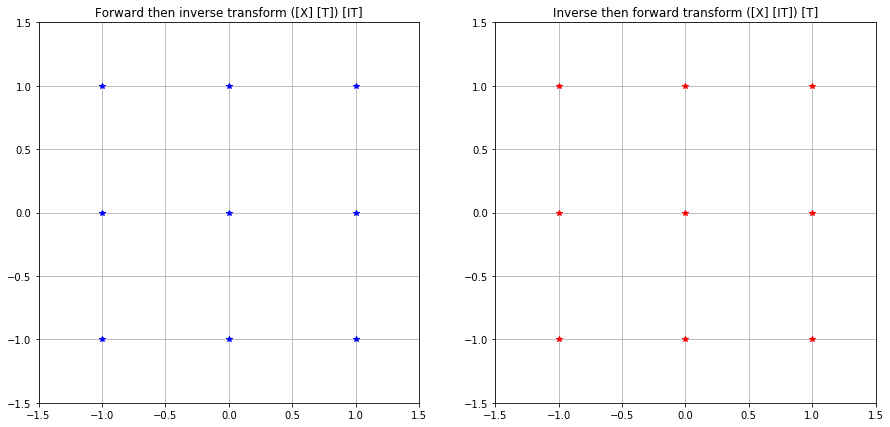

In [105]:
theta = math.pi/6

#tranformation matrix, T
IT=[[np.cos(theta),-np.sin(theta),0],
[np.sin(theta),np.cos(theta),0],
[0,0,1]];

#Create Coords, U,V
x = np.arange(-1,2)
y = np.arange(-1,2)
U,V= np.meshgrid(x,y)


#Create list of points, X, from U and V
X=np.zeros([9,3])
for i in range (0,3):
    for j in range (0,3):
        X[3*i+j,:] = np.array([U[i,j],V[i,j],1])
 
Y = np.matmul(X,IT)

# Plot X and Y
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(15,7))
ax1.plot(X[:,0],X[:,1],'b*')
ax1.set_title('Original points')
ax1.grid(True)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])

ax2.plot(Y[:,0],Y[:,1],'r*')
ax2.set_title('Inverse transform')
ax2.grid(True)


#Take original matrix X, forward transform, then inverse transform

Y = np.matmul(X,T)
Z = np.matmul(Y,IT)

fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(15,7))
ax1.plot(Z[:,0],Z[:,1],'b*')
ax1.set_title('Forward then inverse transform ([X] [T]) [IT]')
ax1.grid(True)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])

Y2 = np.matmul(X,IT)
Z2 = np.matmul(Y2,T)
ax2.plot(Z2[:,0],Z2[:,1],'r*')
ax2.set_title('Inverse then forward transform ([X] [IT]) [T]')
ax2.grid(True)
ax2.set_xlim([-1.5,1.5])
ax2.set_ylim([-1.5,1.5])

In [1]:
## Rotation of image 
adapted from https://stackoverflow.com/questions/19684617/image-rotation-by-matlab-without-using-imrotate

SyntaxError: invalid syntax (<ipython-input-1-460d5900ec42>, line 2)

Text(0.5, 1.0, 'Rotated image around point (108,108)')

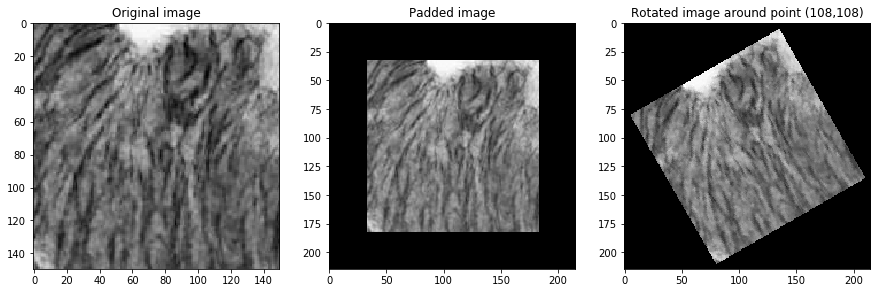

In [8]:
# Translated to Python3 by John Sims, 2/12/2019, from
# https://stackoverflow.com/questions/19684617/image-rotation-by-matlab-without-using-imrotate

import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import math

#rotation:
theta = math.pi/6

# import image from skimage
im=data.immunohistochemistry()

#convert to grayscale
grayIm = rgb2gray(im)

# Take a portion of original image 
image = grayIm[0:150,0:150]

#image padding
Rows, Cols = np.shape(image);
Diagonal = np.sqrt(Rows**2 + Cols**2)
RowPad = (np.ceil(Diagonal - Rows) + 2).astype('int')
ColPad = (np.ceil(Diagonal - Cols) + 2).astype('int')
imagepad = np.zeros([Rows+RowPad, Cols+ColPad])
imagepad[np.int(np.ceil(RowPad/2)):np.int(np.ceil(RowPad/2)+Rows),
         np.int(np.ceil(ColPad/2)):np.int(np.ceil(ColPad/2)+Cols)] = image

RowImpad, ColImpad = np.shape(imagepad)

# midpoints
midx=np.ceil((RowImpad+1)/2).astype('int')
midy=np.ceil((ColImpad+1)/2).astype('int')

imagerot= np.zeros([RowImpad, ColImpad]) # midx and midy same for both

for i in range (0, RowImpad):
    for j in range (0, ColImpad):

         x= (i-midx)*np.cos(theta)+(j-midy)*np.sin(theta)
         y=-(i-midx)*np.sin(theta)+(j-midy)*np.cos(theta)
         x=np.round(x) + midx
         y=np.round(y) + midy

         if (x>=0 and y>=0 and x<ColImpad and y<RowImpad):
              imagerot[i,j]=imagepad[x.astype('int'),y.astype('int')] #k degrees rotated image         

#Plot results        
fig, ((ax1, ax2,ax3)) = plt.subplots(1,3,figsize=(15,7))
ax1.imshow(image,cmap='gray')
ax1.set_title('Original image')
ax2.imshow(imagepad,cmap='gray')
ax2.set_title('Padded image')
ax3.imshow(imagerot,cmap='gray')
ax3.set_title(f'Rotated image around point ({midx},{midy})')


## Inverse rotation using warp and Similarity Tranformation
Define trans. matrix in tform, then warp. 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


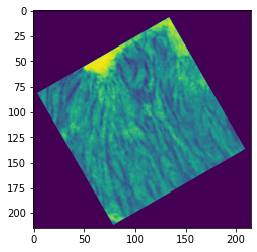

In [33]:
from skimage.transform import warp
from skimage.transform import SimilarityTransform as st
import matplotlib.pyplot as plt

tform = st(scale=1.0, rotation=np.pi/6,translation=(70, -40))
warped = warp(imagepad, tform)

plt.imshow(warped)
plt.show()
